# Imports

In [1]:
import pandas as pd
import numpy as np

# Auctions

In [3]:
auctions = pd.read_csv("../../data/auctions.csv")

## Inspección de columnas y tipos

In [10]:
auctions.dtypes

auction_type_id    float64
country              int64
date                object
device_id            int64
platform             int64
ref_type_id          int64
source_id            int64
dtype: object

In [39]:
len(auctions)

19571319

### Para la columna "auction_type_id"

In [4]:
auctions["auction_type_id"].isna().any()

True

In [5]:
auctions["auction_type_id"].value_counts()

Series([], Name: auction_type_id, dtype: int64)

In [6]:
auctions["auction_type_id"].isna().all()

True

### Como todos los valores son nulos, se descarta la columna

In [7]:
del auctions["auction_type_id"]

***

### Para la columna "country"

In [12]:
auctions["country"].value_counts()

6333597102633388268    19571319
Name: country, dtype: int64

In [13]:
auctions["country"].isna().any()

False

### Conclusión: Como no tiene valores nulos y todos los valores son iguales, se descarta la columna. Además se sabe que el país es Uruguay.

In [42]:
del auctions["country"]

***

### Para la columna "date"

In [8]:
auctions["date"] = pd.to_datetime(auctions["date"])

In [9]:
auctions["date"].isna().any()

False

In [10]:
auctions["date"].describe()

count                       19571319
unique                      19570963
top       2019-03-13 18:19:02.095780
freq                               2
first     2019-03-05 00:52:33.352526
last      2019-03-13 23:59:59.997032
Name: date, dtype: object

### Conclusión: No parece haber fechas anómalas; no hay fechas nulas.
***

### Para la columna "device_id"

In [11]:
auctions["device_id"].isna().any()

False

### ¿Cuántos dispositivos distintos hay?

In [12]:
auctions["device_id"].value_counts().shape[0]

206977

### Se convierte a categóriga porque hay mucho menos valores diferentes que valores totales en el dataset

In [13]:
auctions["device_id"] = pd.Categorical(auctions["device_id"])

***

### Para la columna "platform"

In [14]:
auctions["platform"].isna().any()

False

In [15]:
auctions["platform"].value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

### Como solo hay dos valores posibles, se convierte a categórica. No hay nulos. Se asume que no se trabaja con otros sistemas operativos.

In [16]:
auctions["platform"] = pd.Categorical(auctions["platform"])

***

### Para la columna "ref_type_id"

In [17]:
auctions["ref_type_id"].isna().any()

False

In [18]:
auctions["ref_type_id"].value_counts()

1    15541825
7     4029494
Name: ref_type_id, dtype: int64

### Como solo tiene dos valores posibles, conviene convertirla a categórica (ya que representa apple ifa o google advertising id). También hay que analizar si conviene quedarse con esta columna o con platform, ya que en esencia representan lo mismo.

In [19]:
auctions["ref_type_id"] = pd.Categorical(auctions["ref_type_id"])

***

### Para la columna "source_id"

In [20]:
auctions["source_id"].isna().any()

False

In [21]:
auctions["source_id"].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

### Como no tiene valores nulos, se convierte a categórica.

In [22]:
auctions["source_id"] = pd.Categorical(auctions["source_id"])

## Conclusiones para "auctions": Descartar el país y el tipo de auction, convertir las fechas y cargar las demás columnas como categóricas.

***

# Events

In [2]:
events = pd.read_csv("../../data/events.csv")

C:\Users\Mateo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Inspección de columnas y tipos

In [3]:
events.dtypes

date                   object
event_id                int64
ref_type                int64
ref_hash                int64
application_id          int64
attributed               bool
device_countrycode      int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id               object
user_agent            float64
event_uuid             object
carrier               float64
kind                  float64
device_os             float64
wifi                   object
connection_type        object
ip_address              int64
device_language       float64
dtype: object

In [10]:
len(events)

2494423

### Para la columna "date"

In [4]:
events["date"].isna().any()

False

In [5]:
events["date"] = pd.to_datetime(events["date"])

In [6]:
events["date"].describe()

count                        2494423
unique                       2488829
top       2019-03-12 14:36:58.017000
freq                               3
first     2019-03-05 00:00:00.255000
last      2019-03-13 23:59:59.984000
Name: date, dtype: object

### No hay valores nulos ni tampoco inconsistentes.
***

### Para la columna "event_id"

In [7]:
events["event_id"].isna().any()

False

In [12]:
events["event_id"].value_counts().shape[0]

568

### Como solo hay 568 valores posibles para el tipo de eventos, lo convertimos a categórica.

In [13]:
events["event_id"] = pd.Categorical(events["event_id"])

***

### Para la columna "ref_type"

In [14]:
events["ref_type"].isna().any()

False

In [15]:
events["ref_type"].value_counts()

1891515180541284343    1882743
1494519392962156891     611680
Name: ref_type, dtype: int64

### Podría tomarse la decisión de tomar al valor que más aparece como google_advertising_id, para ser consistente con el dataset de auctions. De todos modos, al tener dos valores posibles se lo toma como categórico.

In [16]:
events["ref_type"] = pd.Categorical(events["ref_type"])

***

### Para la columna "ref_hash"

In [17]:
events["ref_hash"].isna().any()

False

In [19]:
events["ref_hash"].value_counts().shape[0]

196049

### Se convierte a categórica, como se hizo en auctions.

In [22]:
events["ref_hash"] = pd.Categorical(events["ref_hash"])

***

### Para la columna "application_id"

In [23]:
events["application_id"].isna().any()

False

In [26]:
events["application_id"].value_counts().shape[0]

269

### Se convierte a categórica, ya que hay mucho menos valores posibles que totales

In [27]:
events["application_id"] = pd.Categorical(events["application_id"])

***

### Para la columna "attributed"

In [28]:
events["attributed"].isna().any()

False

In [29]:
events["attributed"].value_counts()

False    2489324
True        5099
Name: attributed, dtype: int64

### Se convierte a tipo booleano.

In [30]:
events["attributed"] = events["attributed"].astype("bool")

***

### Para la columna "device_countrycode"

In [32]:
events["device_countrycode"].isna().any()

False

In [33]:
events["device_countrycode"].value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

### Como el país es Uruguay, se descarta la columna ya que todos los valores son iguales.

In [34]:
del events["device_countrycode"]

***

### Para la columna "device_os_version"

In [35]:
events["device_os_version"].isna().any()

True

In [36]:
events["device_os_version"].isna().value_counts()

True     1472357
False    1022066
Name: device_os_version, dtype: int64

### Se observa que aproximadamente el 60% de los valores son nulos

In [40]:
events["device_os_version"].value_counts().shape[0]

81

### Al ser solo 81 valores posibles, se convierte la columna a categórica

In [41]:
events["device_os_version"] = pd.Categorical(events["device_os_version"])

***

### Para la columna "device_brand"

In [42]:
events["device_brand"].isna().any()

True

In [43]:
events["device_brand"].isna().value_counts()

True     1329460
False    1164963
Name: device_brand, dtype: int64

### Se observa que aproximadamente el 53% de los valores son nulos

In [47]:
events["device_brand"].value_counts().shape[0]

250

### Se convierte a categórica

In [48]:
events["device_brand"] = pd.Categorical(events["device_brand"])

***

### Para la columna "device_model"

In [49]:
events["device_model"].isna().any()

True

In [50]:
events["device_model"].isna().value_counts()

False    2406456
True       87967
Name: device_model, dtype: int64

In [152]:
87967/len(events)

0.03526547021094658

In [51]:
events["device_model"].value_counts().shape[0]

2624

### Se convierte a categórica

In [52]:
events["device_model"] = pd.Categorical(events["device_model"])

***

### Para la columna "device_city"

In [53]:
events["device_city"].isna().any()

True

In [57]:
events["device_city"].isna().value_counts()

True     1879725
False     614698
Name: device_city, dtype: int64

### Se observa que aproximadamente el 75% de los valores son nulos

In [60]:
events["device_city"].value_counts().shape[0]

127

### Se convierte a categórica

In [64]:
events["device_city"] = pd.Categorical(events["device_city"])

***

### Para la columna "session_user_agent"

In [65]:
events["session_user_agent"].isna().any()

True

In [66]:
events["session_user_agent"].isna().value_counts()

False    2482637
True       11786
Name: session_user_agent, dtype: int64

### Se observa que los valores nulos no llegan a 1%

In [69]:
events["session_user_agent"].value_counts().shape[0]

1460

### Se convierte a categórica

In [70]:
events["session_user_agent"] = pd.Categorical(events["session_user_agent"])

***

### Para la columna "trans_id"

In [71]:
events["trans_id"].isna().any()

True

In [72]:
events["trans_id"].isna().value_counts()

True     2494341
False         82
Name: trans_id, dtype: int64

### Se observa que casi el 100% de los valores son nulos

In [74]:
events["trans_id"] = pd.Categorical(events["trans_id"])

***

### Para la columna "user_agent"

In [76]:
events["user_agent"].isna().any()

True

In [88]:
events["user_agent"].isna().value_counts()

False    1391527
True     1102896
Name: user_agent, dtype: int64

### Se observa que aproximadamente el 44% de los valores son nulos

In [79]:
events["user_agent"].value_counts().shape[0]

5111

### Se convierte a categórica

In [86]:
events["user_agent"] = pd.Categorical(events["user_agent"])

***

### Para la columna "event_uuid"

In [92]:
events["event_uuid"].isna().any()

True

In [93]:
events["event_uuid"].isna().value_counts()

False    2489324
True        5099
Name: event_uuid, dtype: int64

### Se observa que menos del 1% de los valores son nulos

In [97]:
events["event_uuid"].value_counts().shape[0]

2489324

### Conviene dejarla tal cual está pues los valores son todos diferentes

***

### Para la columna "carrier"

In [101]:
events["carrier"].isna().any()

True

In [102]:
events["carrier"].isna().value_counts()

True     1877989
False     616434
Name: carrier, dtype: int64

In [103]:
1877989 / len(events)

0.7528751138038737

### Se observa que aproximadamente el 75% de los valores son nulos

In [105]:
events["carrier"].value_counts().shape[0]

84

### Se convierte a categórica

In [106]:
events["carrier"] = pd.Categorical(events["carrier"])

*** 

### Para la columna "kind"

In [108]:
events["kind"].isna().any()

True

In [110]:
events["kind"].isna().value_counts()

False    2489324
True        5099
Name: kind, dtype: int64

### Se observa que menos del 1% de los valores son nulos

In [111]:
events["kind"].value_counts().shape[0]

583

### Se convierte a categórica

In [114]:
events["kind"] = pd.Categorical(events["kind"])

***

### Para la columna "device_os"

In [117]:
events["device_os"].isna().any()

True

In [118]:
events["device_os"].isna().value_counts()

True     1836756
False     657667
Name: device_os, dtype: int64

### Se observa que aproximadamente el 74% de los valores son nulos

In [121]:
events["device_os"].value_counts()

7.531669e+18    389811
6.941825e+18    260861
2.748831e+18      6110
5.916187e+18       885
Name: device_os, dtype: int64

### Conviene cargarlos como categórico

In [122]:
events["device_os"] = pd.Categorical(events["device_os"])

***

### Para la columna "wifi"

In [123]:
events["wifi"].isna().any()

True

In [124]:
events["wifi"].isna().value_counts()

False    1378872
True     1115551
Name: wifi, dtype: int64

### Se observa que aproximadamente el 45% de los valores son nulos

In [126]:
events["wifi"].value_counts()

True     930902
False    447970
Name: wifi, dtype: int64

### Se convierte a booleano

In [127]:
events["wifi"] = events["wifi"].astype("bool")

***

### Para la columna "connection_type"

In [128]:
events["connection_type"].isna().any()

True

In [129]:
events["connection_type"].isna().value_counts()

True     1881960
False     612463
Name: connection_type, dtype: int64

### Se observa que aproximadamente el 75% de los valores son nulos

In [134]:
events["connection_type"].value_counts()

Cable/DSL    331948
Cellular     280511
Corporate         4
Name: connection_type, dtype: int64

### Se convierte a categórica

In [135]:
events["connection_type"] = pd.Categorical(events["connection_type"])

***

### Para la columna "ip_address"

In [136]:
events["ip_address"].isna().any()

False

In [142]:
events["ip_address"].value_counts().shape[0]

285212

### No ahorra memoria convertir el tipo de dato, se deja tal cual está

***

### Para la columna "device_language"

In [145]:
events["device_language"].isna().any()

True

In [146]:
events["device_language"].isna().value_counts()

False    2406604
True       87819
Name: device_language, dtype: int64

In [153]:
87819/len(events)

0.035206137852320955

In [148]:
events["device_language"].value_counts().shape[0]

186

### Se convierte a categórica

In [149]:
events["device_language"] = pd.Categorical(events["device_language"])

***

## Conclusiones para events:
- __date__: No hay valores nulos ni anómalos
- __event_id__: No hay valores nulos, hay 568 diferentes. Categórica.
- __ref_type__: No hay nulos, se toma como categórica.
- __ref_hash__: No hay nulos, se toma como categórica.
- __application_id__: No hay nulos, se toma como categórica.
- __attributed__: No hay nulos. Se toma booleana.
- __device_countrycode__: No hay nulos, pero son todos iguales. Se descarta.
- __device_os_version__: 60% de nulos, 81 valores distintos. Se toma categórica.
- __device_brand__: 53% de nulos, 250 valores posibles. Se toma categórica.
- __device_model__: 4% de nulos, 2624 valores posibles. Se toma categórica.
- __device_city__: 75% de nulos, 127 valores posibles. Se toma categórica.
- __session_user_agent__: Menos de 1% de nulos, 1460 valores posibles. Se toma categórica.
- __trans_id__: 99,99% de nulos, sólo 82 no lo son. Se toma categórica.
- __user_agent__: 44% de nulos, hay 5111 valores diferentes. Se toma categórica.
- __event_uuid__: Menos del 1% de valores nulos, se deja tal cual está porque todos los valores que no son nulos son diferentes.
- __carrier__: 75% de nulos, 84 valores posibles.Se toma categórica.
- __kind__: menos del 1% de nulos, 583 valores distintos. Se toma categórica.
- __device_os__: 74% de nulos, 4 valores posibles. Se toma categórica.
- __wifi__: 45% de nulos, se convierte a booleana.
- __connection_type__: 75% de nulos, 3 valores posibles. Se convierte a categórica.
- __ipaddress__: No hay nulos, 285212 valores distintos. Se deja tal cual está porque no se ahorra memoria.
- __device_language__: 3% de nulos, 186 valores posibles. Se pasa a categórica.

***

# Archivo clicks

In [ ]:
clicks = pd.read_csv()

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

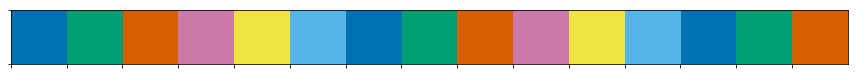

In [4]:
sns.palplot(sns.color_palette("colorblind", 15))

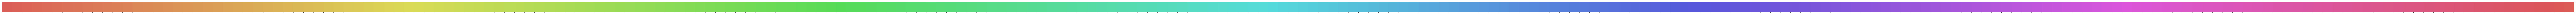

In [17]:
sns.palplot(sns.color_palette("hls", 256))